In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

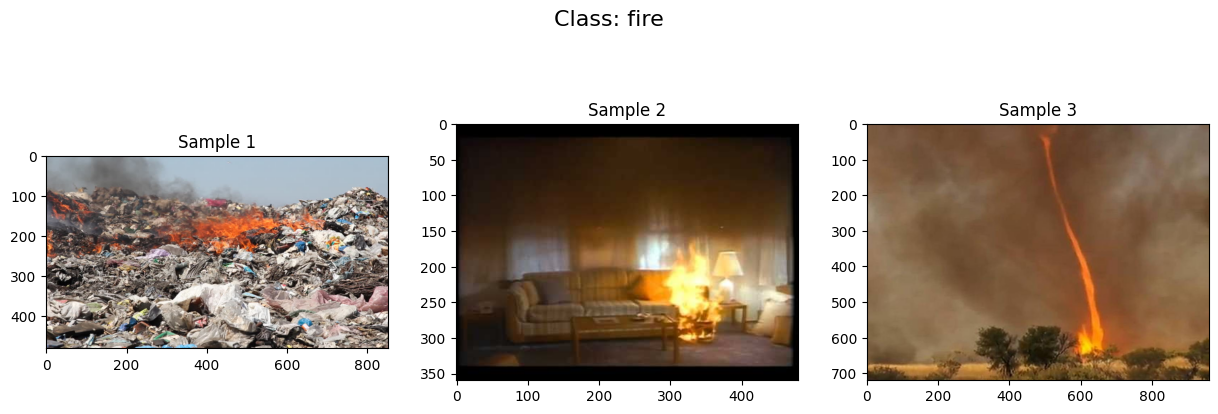

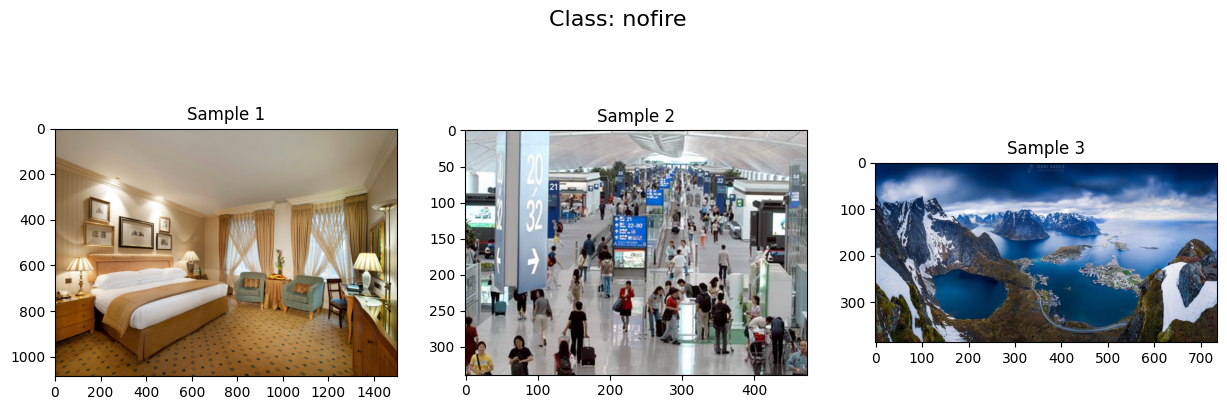

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display sample images
def display_samples(dataset_path, num_samples_per_class=3):
    class_names = os.listdir(dataset_path)

    for class_name in class_names:
        class_path = os.path.join(dataset_path, class_name)
        image_files = os.listdir(class_path)[:num_samples_per_class]

        plt.figure(figsize=(15, 5))
        plt.suptitle(f"Class: {class_name}", fontsize=16)

        for i, image_file in enumerate(image_files, 1):
            image_path = os.path.join(class_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(1, num_samples_per_class, i)
            plt.imshow(img)
            plt.title(f"Sample {i}")

        plt.show()

# Example usage:
dataset_path = 'D:/Project/III Year/archive/other/Training and Validation/'
display_samples(dataset_path)


In [19]:
import os
import cv2

def get_image_dimensions(dataset_path):
    image_dimensions = []

    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)

            # Error handling: Check if the image is successfully loaded
            img = cv2.imread(image_path)
            if img is None:
                print(f"Error loading image: {image_path}")
                continue

            # If the image is loaded successfully, get its dimensions
            dimensions = img.shape[:2]  # Height, Width
            image_dimensions.append(dimensions)

    return image_dimensions

# Example usage:
dataset_path = 'D:/Project/III Year/archive/other/Training and Validation/'
dimensions = get_image_dimensions(dataset_path)

# Print the dimensions or perform further analysis
print("Image Dimensions:")
for dimension in dimensions[:5]:  # Display dimensions of the first 5 images
    print(dimension)


Image Dimensions:
(480, 852)
(360, 480)
(720, 960)
(442, 630)
(531, 800)


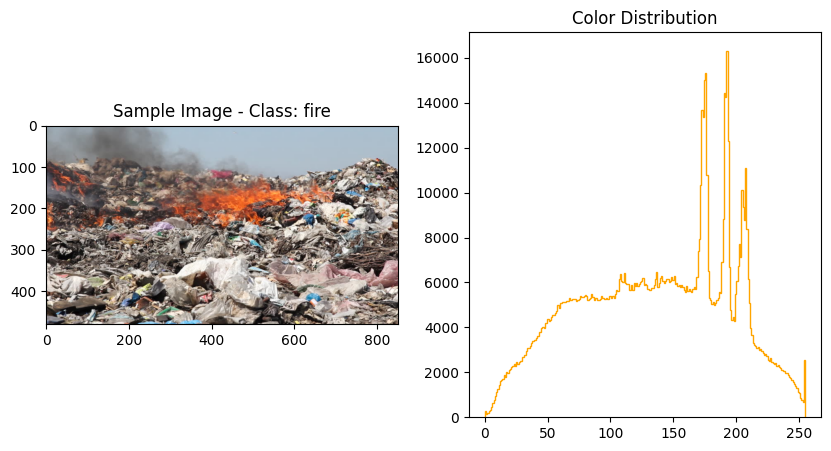

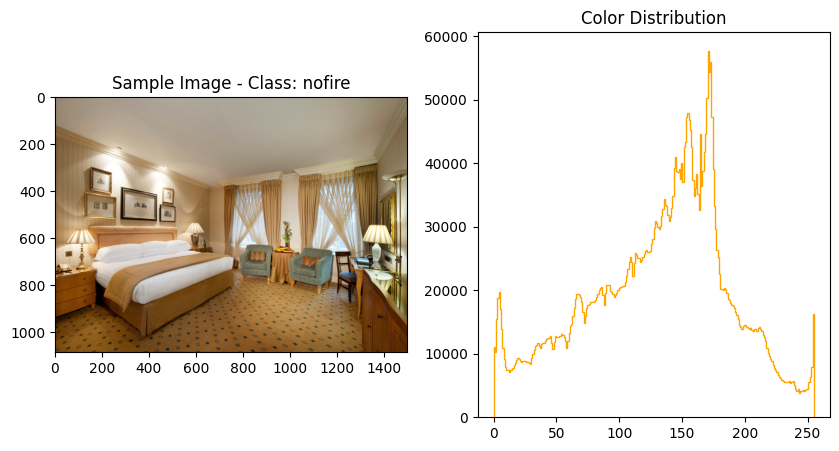

In [9]:
import os
import cv2
import matplotlib.pyplot as plt

def visualize_color_distribution(dataset_path):
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        image_path = os.path.join(class_path, os.listdir(class_path)[0])
        
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title(f"Sample Image - Class: {class_name}")

        plt.subplot(1, 2, 2)
        plt.hist(img.ravel(), bins=256, color='orange', histtype='step')
        plt.title("Color Distribution")

        plt.show()

# Example usage:
dataset_path = 'D:/Project/III Year/archive/other/Training and Validation/'
visualize_color_distribution(dataset_path)


In [20]:
import os
import cv2
import numpy as np
import pandas as pd

def calculate_correlation(dataset_path):
    data = {'Class': [], 'Mean_Brightness': [], 'Mean_Colorfulness': []}

    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)

            # Error handling: Check if the image is successfully loaded
            img = cv2.imread(image_path)
            if img is None:
                print(f"Error loading image: {image_path}")
                continue

            # If the image is loaded successfully, calculate mean brightness and colorfulness
            # Calculate mean brightness
            mean_brightness = np.mean(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

            # Calculate mean colorfulness
            mean_colorfulness = np.mean(cv2.absdiff(cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:, :, 1], cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:, :, 2]))

            # Use one-hot encoding for the 'Class' column
            data['Class'].append(class_name)
            data['Mean_Brightness'].append(mean_brightness)
            data['Mean_Colorfulness'].append(mean_colorfulness)

    df = pd.DataFrame(data)

    # Convert 'Class' column to numeric using one-hot encoding
    df = pd.get_dummies(df, columns=['Class'], drop_first=True)

    correlation_matrix = df.corr()

    return correlation_matrix

# Example usage:
dataset_path = 'D:/Project/III Year/archive/other/Training and Validation/'
correlation_matrix = calculate_correlation(dataset_path)

# Print the correlation matrix or perform further analysis
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                   Mean_Brightness  Mean_Colorfulness  Class_nofire
Mean_Brightness           1.000000          -0.030564      0.318823
Mean_Colorfulness        -0.030564           1.000000      0.048825
Class_nofire              0.318823           0.048825      1.000000
